# baby-crying
http://challenge.xfyun.cn/topic/info?type=baby-crying

## 一、赛事背景

对婴儿来说，啼哭声是一种通讯的方式，一个非常有限的，但类似成年人进行交流的方式。它也是一种生物报警器，向外界传达着婴儿生理和心理的需求。基于啼哭声声波携带的信息，婴儿的身体状况才能被确定，疾病才能被检测出来。因此，有效辨识啼哭声，成功地将婴儿啼哭声“翻译”成“成人语言”，让我们能够读懂啼哭声的含义，有重大的实际意义。本届竞赛将从真实场景和实际应用出发，新增了更具挑战性、更加务实的任务，期待参赛选手们能在这些任务上相互切磋、共同进步。
## 二、赛事任务

婴儿啼哭声识别挑战赛旨在判别婴儿啼哭声所传递的信息，本次挑战赛设置了更具挑战性的任务，相比其他竞赛，本次竞赛所提供的训练数据更少，总体为低资源的竞赛任务，具体包含：

    初赛：训练数据集每类啼哭声只包含两条音频数据，简单噪声环境下识别。
    复赛：复杂噪声环境下婴儿啼哭声识别，判断容易引起混淆的啼哭声，分析各类啼哭声的明显特征及简单直接的判别方式。

## 三、评审规则
### 1.数据说明：

1.训练数据集包含六类哭声，已人工添加噪声。

A：awake（苏醒）

B：diaper（换尿布）

C：hug（要抱抱）

D：hungry（饥饿）

E：sleepy（困乏）

F：uncomfortable（不舒服）

2.噪声数据来源Noisex-92标准数据库。

3.初赛测试集包含228条音频数据，复赛将提供更大更复杂的测试数据。

为了保证比赛的公平性，本次比赛仅允许使用官方发布的数据和标注，否则比赛成绩将被视为无效。不符合规定的情况包括以下几种：

a)参赛系统搭建过程中有任何一个环节（包括数据加噪、模型初始化等）用到了官方发布的训练数据集之外的其他数据；

b)其他对发布数据集的人工处理，比如人工对数据集进行语音端点检测等；

这种情况是允许的：仅利用官方发布的训练数据集进行数据的机器仿真和加噪。
### 2.评估指标: 分类正确率
即分类正确的哭声条数/所有待测音频条数。

训练集合供参加竞赛的科研单位以及开发者调试系统使用，最终排名以参赛者提交的系统在线上测试集合上的结果为准，分类正确率越高排名越靠前。
### 3.评测及排行

1、初赛和复赛均提供下载数据，选手在本地进行算法调试，在比赛页面提交结果。

2、每支团队每天最多提交3次。

3、排行按照得分从高到低排序，排行榜将选择团队的历史最优成绩进行排名。
## 四、作品提交要求

【举例】：

1、文件格式：按照csv格式提交

2、文件大小：无要求

3、提交次数限制：每支队伍每天最多3次

4、文件详细说明：

1) 以csv格式提交，编码为UTF-8，第一行为表头；

2) 提交格式见样例；

id,label

test001.wav,hungry

test002.wav,sleepy

5、不需要上传其他文件

6、复赛需提供文档简要分析并回答提要所涉及的相关问题。
## 五、赛程规则
初赛 6月22日——8月21日

    初赛截止成绩以团队在初赛时间段内最优成绩为准（不含测试排名）。

    初赛作品提交截止日期为８月20日17:00；初赛名次公布日期为8月21日10:00。

复赛 8月21日——9月21日

    排名前20%的团队晋级复赛，大赛官网将公示团队信息。选手通过大赛官网下载新增的训练集和开发集，本地调试算法，在线提交结果。

    复赛成绩以参赛团队在复赛时间段内最优成绩为准。

    复赛作品提交截止日期为９月20日17:00；复赛名次公布日期为９月21日10:00。

决赛 10月24日

    前三名团队将受邀参加科大讯飞全球1024开发者节并于现场进行决赛。

    决赛以答辩（10min陈述+5min问答）的形式进行。

    根据复赛成绩和答辩成绩综合评分（复赛成绩占比70%，现场答辩分数占比30%）。

## 六、奖项设置

    入围复赛

        复赛入围证书

        大赛专属Geek礼包

        大赛限量文化衫

    入围决赛

        科大讯飞1024开发者节全场通票

        决赛入围证书

        科大讯飞创孵基地绿色入驻通道

        A.I.服务市场入驻特权

    决赛胜出

        决赛奖金，各赛道TOP10选手将阶梯获得赛道奖金，第一名3万元、第二名2万元、第三名1万元、第四-第十名分别获得“算法菁英奖”2500元。

        参与1024全球开发者节颁奖盛典，现场授予奖金、证书与定制奖杯

        A.I.全链创业扶持

        绿色就业通道&讯飞Offer

# 思路

In [ ]:
6分类

# lib import

In [28]:
# export
import torchaudio
import os
import tqdm
from code.config import * 
from loguru import logger
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
args.DATA_DIR

'../../data/contest/20kdxfbaby_cry/'

In [3]:
!ls ../../data/contest/20kdxfbaby_cry/

test
train
婴儿啼哭声识别挑战赛_婴儿啼哭声识别挑战赛提交样例.csv


In [4]:
!ls ../../data/contest/20kdxfbaby_cry/train

awake         hug           sleepy
diaper        hungry        uncomfortable


In [5]:
!ls ../../data/contest/20kdxfbaby_cry/train/hug

hug_0.wav   hug_122.wav hug_147.wav hug_28.wav  hug_52.wav  hug_77.wav
hug_1.wav   hug_123.wav hug_148.wav hug_29.wav  hug_53.wav  hug_78.wav
hug_10.wav  hug_124.wav hug_149.wav hug_3.wav   hug_54.wav  hug_79.wav
hug_100.wav hug_125.wav hug_15.wav  hug_30.wav  hug_55.wav  hug_8.wav
hug_101.wav hug_126.wav hug_150.wav hug_31.wav  hug_56.wav  hug_80.wav
hug_102.wav hug_127.wav hug_151.wav hug_32.wav  hug_57.wav  hug_81.wav
hug_103.wav hug_128.wav hug_152.wav hug_33.wav  hug_58.wav  hug_82.wav
hug_104.wav hug_129.wav hug_153.wav hug_34.wav  hug_59.wav  hug_83.wav
hug_105.wav hug_13.wav  hug_154.wav hug_35.wav  hug_6.wav   hug_84.wav
hug_106.wav hug_130.wav hug_155.wav hug_36.wav  hug_60.wav  hug_85.wav
hug_107.wav hug_131.wav hug_156.wav hug_37.wav  hug_61.wav  hug_86.wav
hug_108.wav hug_132.wav hug_157.wav hug_38.wav  hug_62.wav  hug_87.wav
hug_109.wav hug_133.wav hug_158.wav hug_39.wav  hug_63.wav  hug_88.wav
hug_11.wav  hug_134.wav hug_159.wav hug_4.wav   hug_64.wav  hug_89.wav
hug_110

# EDA

In [24]:
os.listdir(args.DATA_DIR)

['婴儿啼哭声识别挑战赛_婴儿啼哭声识别挑战赛提交样例.csv', 'test', 'train']

In [34]:
tensors, tensor_lens, labels, rates = [],[],[],[]
for i in ['test', 'train']:
    for ii in os.listdir(os.path.join(args.DATA_DIR, i)):
        if ii.endswith('.wav'):
            waveform, sample_rate = torchaudio.load(os.path.join(args.DATA_DIR, i, ii))
            tensors.append(waveform)
            rates.append(sample_rate)
            labels.append('UNK')
            tensor_lens.append(waveform[0].size(0))
        else: 
            print(ii)
            for iii in os.listdir(os.path.join(args.DATA_DIR, i, ii)):
                if iii.endswith('.wav'):
                    waveform, sample_rate = torchaudio.load(os.path.join(args.DATA_DIR, i, ii, iii))
                    tensors.append(waveform)
                    rates.append(sample_rate)
                    labels.append(ii)
                    tensor_lens.append(waveform[0].size(0))

hug
diaper
hungry
sleepy
awake
uncomfortable


In [36]:
pd.Series(labels).value_counts()

UNK              228
hug              160
uncomfortable    160
hungry           160
awake            160
sleepy           144
diaper           134
dtype: int64

In [37]:
pd.Series(tensor_lens).describe()

count    1.146000e+03
mean     3.705492e+05
std      1.855113e+05
min      2.561500e+04
25%      2.537472e+05
50%      2.806720e+05
75%      3.962880e+05
max      1.260144e+06
dtype: float64

In [41]:
pd.Series(rates).value_counts()

16000    892
44100    242
1600      12
dtype: int64

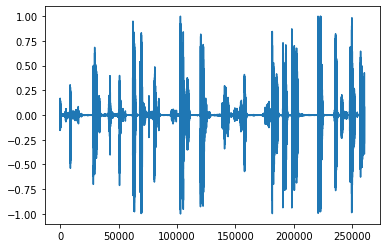

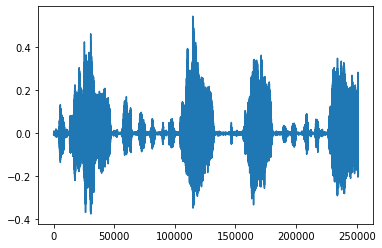

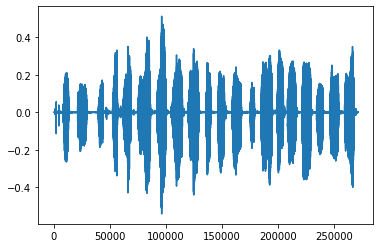

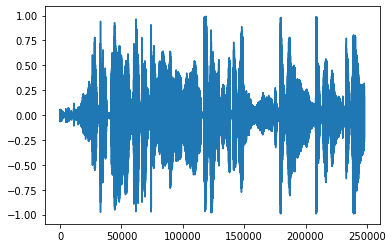

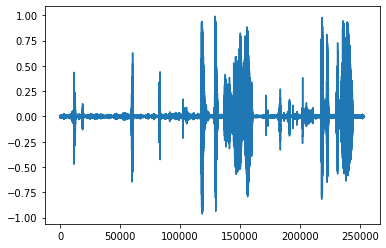

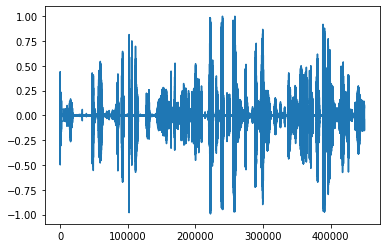

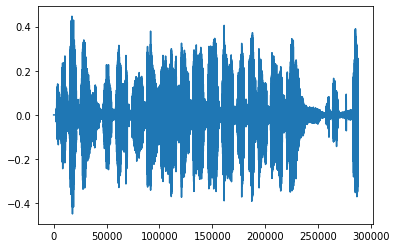

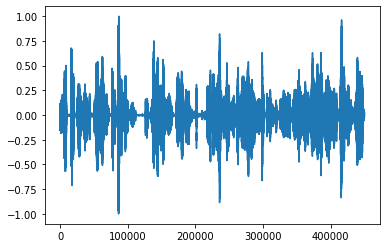

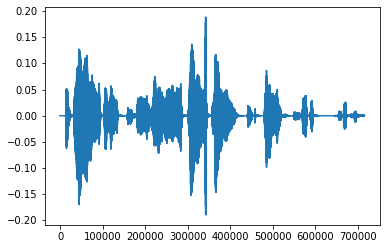

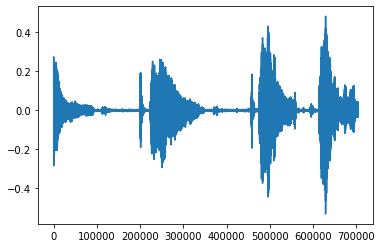

In [40]:
for i in range(10):
    plt.plot(tensors[i].numpy()[0])
    plt.show()

In [42]:
import spectra_torch.base as mm

In [43]:
sig, sr = tensors[0], rates[0]

mfcc = mm.mfcc(sig[0], sr) # MFCC
starts, detection = mm.is_speech(sig, sr, speechlen=1) # VAD

In [47]:
mfcc

tensor([[ -2.4863,   4.3139,  -8.9655,  ...,   7.6485,  24.6240,  11.4864],
        [ -2.8761,   9.0826,  -6.5079,  ...,   5.4211,  34.0243,   8.5508],
        [ -3.5214,   9.3532,  -3.3899,  ...,   2.4015,  25.5595,   4.7668],
        ...,
        [ -1.0884,  11.9462,  -8.7755,  ...,   6.8792,  39.0892,  15.5738],
        [ -0.5260,   7.6894, -15.9049,  ...,   1.0014,  30.1202,   5.9304],
        [ -0.8255,  12.3086,  -9.0103,  ...,   9.1487,  26.1376,   1.9996]])

In [49]:
tensors[0].shape

torch.Size([1, 260256])

In [48]:
mfcc.shape

torch.Size([1626, 13])

In [50]:
starts, detection

(tensor([0]), tensor([0]))

In [51]:
sig, sr = tensors[1], rates[1]

mfcc = mm.mfcc(sig[0], sr) # MFCC
starts, detection = mm.is_speech(sig, sr, speechlen=1) # VAD

In [52]:
mfcc.shape

torch.Size([1569, 13])